# [Kaggle-Seoul Bike Sharing Demand](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

### 1. EDA

In [62]:
df = pd.read_csv(os.getcwd() + '/data/seoulbike/SeoulBikeData.csv', encoding='cp949')
display(df.head(3))
print(df.shape)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


(8760, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [9]:
df.isna().sum().sum()

0

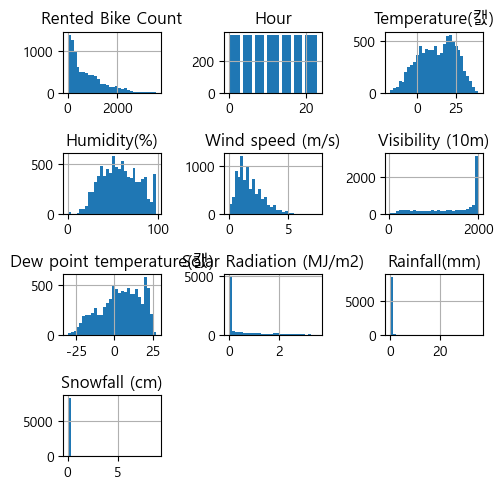

In [13]:
df.hist(bins=30, figsize=(5,5))
plt.tight_layout()
plt.show()

In [14]:
df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [21]:
cate_features = df.select_dtypes('object').columns
for col in cate_features:
    print(f'### {col} / {len(df[col].unique())}개 ###')
    print(df[col].unique())

### Date / 365개 ###
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13

In [63]:
# Hour 컬럼에서 아침, 점심 저녁 값 추출
def time_split(x):
    if x >= 0 and x < 4:
        return 'Dawn'
    elif x >= 4 and x < 8:
        return 'Morning'
    elif x >= 8 and x < 12:
        return 'Late Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    else: return 'Night'
    
df['time_split'] = df['Hour'].apply(time_split)

In [64]:
# Date + Hour 컬럼 생성
df['datetime'] = df['Date'] + ' ' + df['Hour'].astype('str')
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H')
df['datetime'].head(4)

0   2017-12-01 00:00:00
1   2017-12-01 01:00:00
2   2017-12-01 02:00:00
3   2017-12-01 03:00:00
Name: datetime, dtype: datetime64[ns]

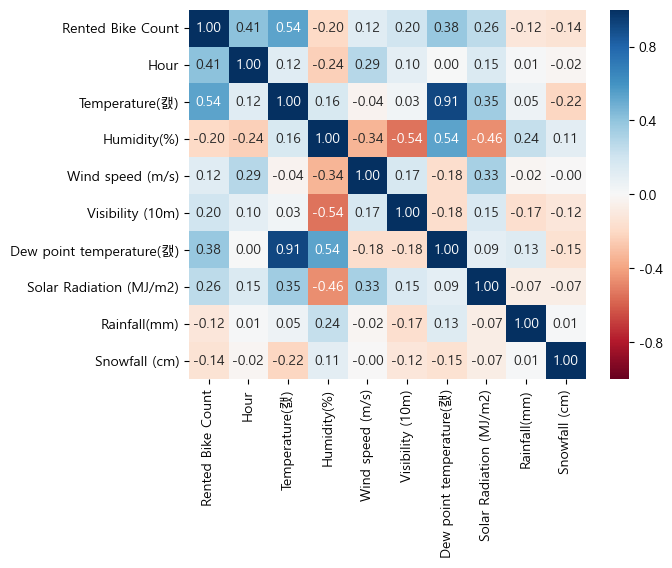

In [39]:
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

### 2. 통계분석
#### 1. 독립표본 t-test
- 귀무가설: 평일과 휴일에 따라 평균 자전거 수요량에 차이가 없다.
- 대립가설: 평일과 휴일에 따라 평균 자전거 수요량에 차이가 있다.

In [5]:
import scipy.stats as stats
no_hoil = df[df['Holiday']=='No Holiday']['Rented Bike Count']
yes_hoil = df[df['Holiday']=='Holiday']['Rented Bike Count']

stats.shapiro(no_hoil) # 등분산 만족 못함
stats.shapiro(yes_hoil) # 등분산 만족 못함
stats.mannwhitneyu(no_hoil, yes_hoil) # 귀무가설 기각

MannwhitneyuResult(statistic=2233371.0, pvalue=2.279911048361832e-17)

#### 2. 일원배치 분산분석
- 귀무가설: 계절에 따라 평균 자전거 수요량에 차이가 없다.
- 대립가설: 적어도 하나의 계절에 대해 평균 자전거 수요량에 차이가 있다.

KruskalResult(statistic=2095.900788061788, pvalue=0.0)


group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,-89.5667,0.0,-113.7722,-65.3613,True
Autumn,Summer,214.4754,0.0,190.2699,238.6809,True
Autumn,Winter,-594.0568,0.0,-618.3956,-569.7179,True
Spring,Summer,304.0421,0.0,279.9029,328.1814,True
Spring,Winter,-504.49,0.0,-528.763,-480.2171,True
Summer,Winter,-808.5322,0.0,-832.8052,-784.2592,True


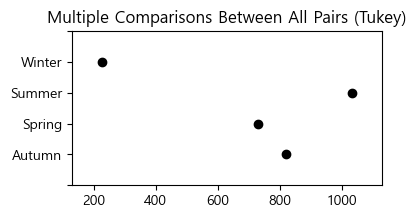

In [66]:
# 계절별 자전거 수요량 변수 만들기
seasons = df['Seasons'].unique()
for i in seasons:
    globals()['{}_value'.format(i)] = df[df['Seasons']==i]['Rented Bike Count']

# 정규성 검정
# for i in seasons:
#     val = globals()['{}_value'.format(i)]
#     print(f'## {i} ##')
#     print(stats.shapiro(val)) # 정규성 모두 만족 못함

# 등분산성 검정
stats.levene(Winter_value, Spring_value, Summer_value, Autumn_value) # 등분산성 만족 못함

# 크루스칼 왈리스 검정
print(stats.kruskal(Winter_value, Spring_value, Summer_value, Autumn_value)) # 귀무가설 기각

# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=df['Rented Bike Count'], groups=df['Seasons'])
a = mc.tukeyhsd(alpha=0.5)
fig = a.plot_simultaneous(figsize=(4,2))
a.summary()

#### 3. 이원배치 분산분석
- 주효과 검정1
    - 귀무가설: 계절에 따라 평균 자전거 수요량에 차이가 없다.
    - 대립가설: 계절에 따라 평균 자전거 수요량에 차이가 있다.
- 주효과 검정1
    - 귀무가설: 근무시간 여부에 따라 평균 자전거 수요량에 차이가 없다.
    - 대립가설: 근무시간 여부에 따라 평균 자전거 수요량에 차이가 있다.
- 교호작용 검정
    - 귀무가설: 계절과 근무시간 여부 간에 상호작용 효과가 없다.
    - 대립가설: 계절과 근무시간 여부 간에 상호작용 효과가 있다.

In [82]:
# 데이터 설정
anova_df = df[['Functioning Day', 'Seasons', 'Rented Bike Count']]
anova_df.rename(columns = {'Functioning Day':'Functioning_Day', 
                           'Rented Bike Count':'Rented_Bike_Count'}, inplace=True)

# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'Rented_Bike_Count ~ C(Seasons) + C(Functioning_Day) + C(Seasons):C(Functioning_Day)'
model = ols(formula, anova_df).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),1.238507e+06,3.0,1.356084,2.577219e-01
C(Functioning_Day),1.504789e+08,1.0,494.294001,1.419976e-106
C(Seasons):C(Functioning_Day),8.265486e+08,3.0,905.017121,0.000000e+00
Residual,2.664998e+09,8754.0,NaN,NaN


- Seasons에 대한 결과, 주효과 검정에서 귀무가설을 기각할 수 없다.
- Functioning Day에 대한 결과 주효과 검정에서 귀무가설을 기각할 수 있다.
- 상호작용 효과 검정 결과, 두 변수 간에는 교호작용이 존재하는 것을 알 수 있다.

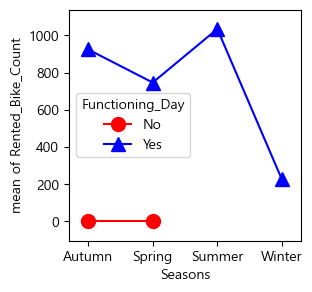

In [89]:
from statsmodels.graphics.factorplots import interaction_plot
seasons = anova_df['Seasons']
bike = anova_df['Rented_Bike_Count']
day = anova_df['Functioning_Day']
fig, ax = plt.subplots(figsize=(3,3))
fig= interaction_plot(seasons, day, bike, colors=['red', 'blue'], markers=['o', '^'], ms=10, ax=ax)

#### 4. 교차검증
- 귀무가설: 계절과 시간대는 연관성이 없다.
- 대립가설: 계절과 시간대는 연관성이 있다.

In [65]:
table = pd.crosstab(df['time_split'], df['Seasons'])
chi, p, _, _ = stats.chi2_contingency(table)
print('통계량: {:.4f} / p-value: {:.4f}'.format(chi, p))

통계량: 0.0000 / p-value: 1.0000


#### 5. 시계열분석

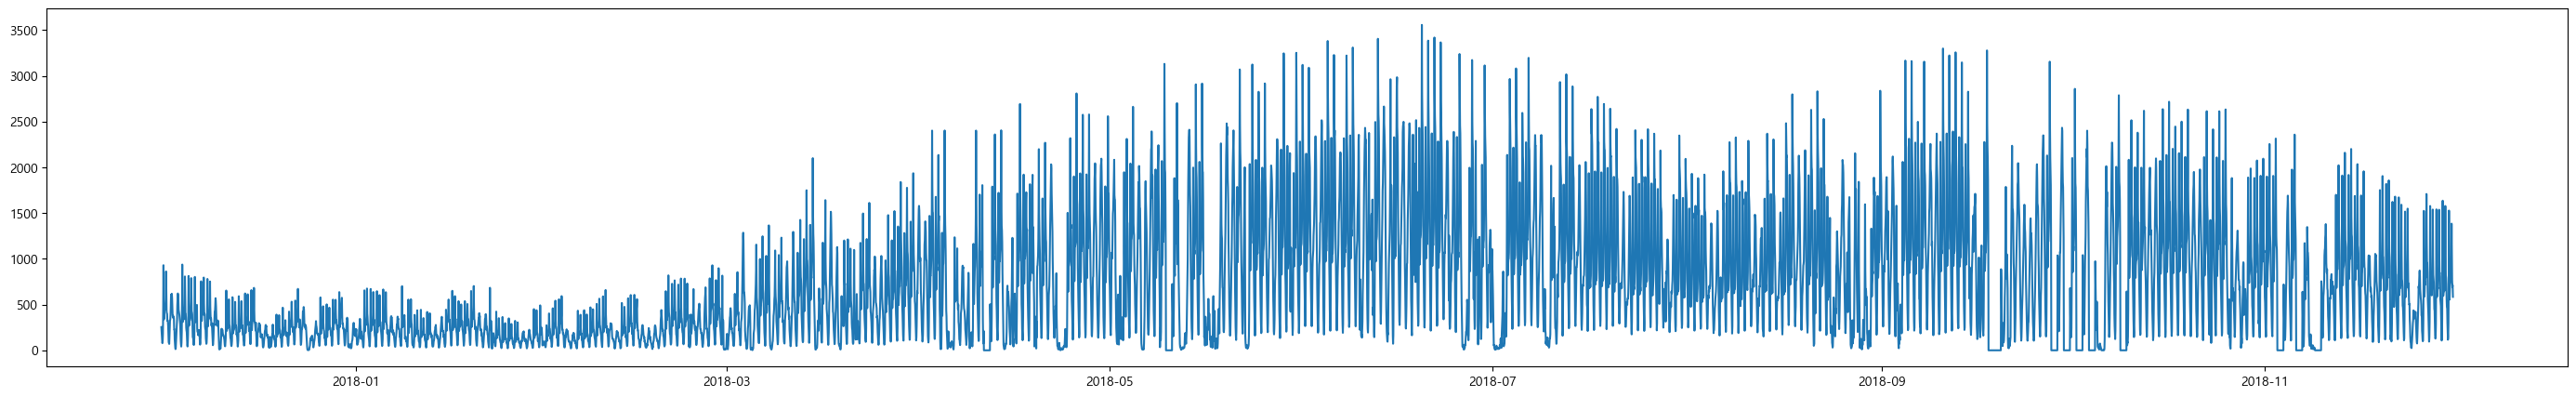

In [11]:
# 데이터 정의
timedf = df[['datetime', 'Rented Bike Count']].set_index('datetime')

# 원본 데이터 시각화
plt.figure(figsize=(35,5))
plt.plot(timedf.index, timedf['Rented Bike Count'])
plt.show()

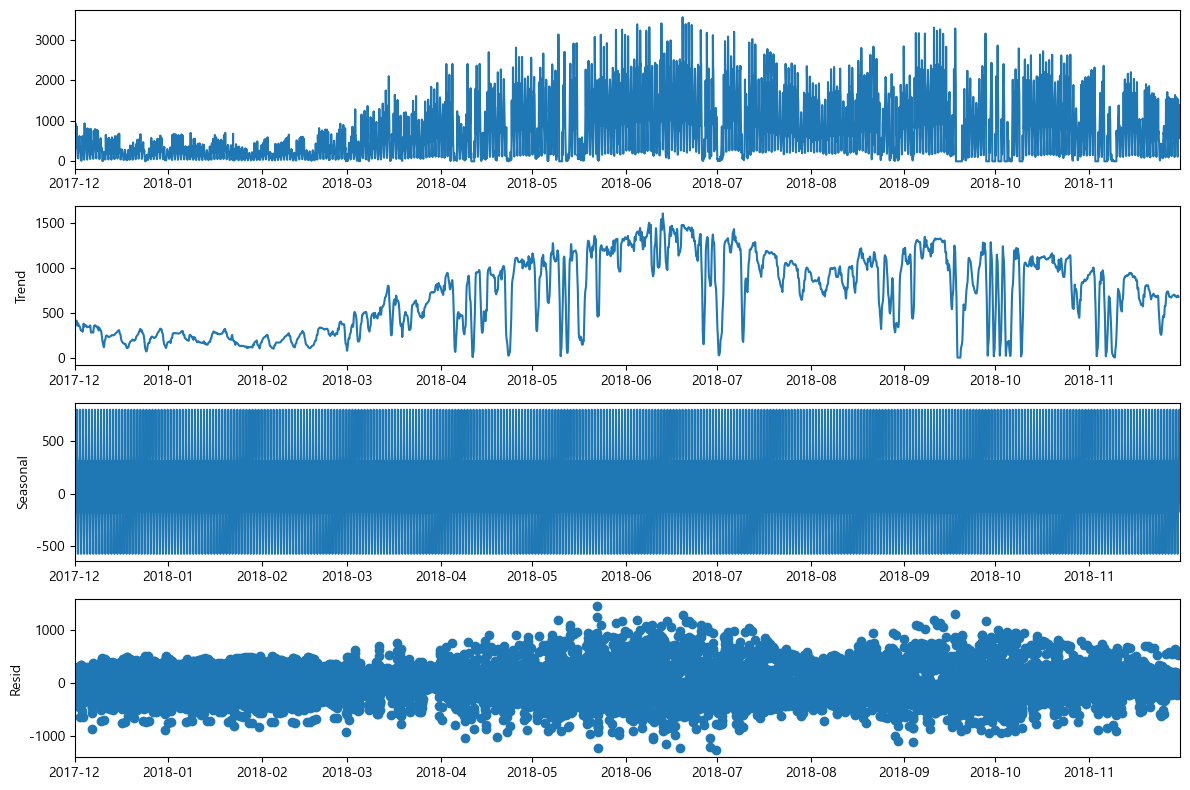

In [12]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
ts = timedf
result = seasonal_decompose(ts, model='addivtive')
plt.rcParams['figure.figsize']=[12,8]
result.plot()
plt.show()

In [13]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller

training = timedf.iloc[:int(len(timedf)*0.7), :]
test = timedf.drop(training.index)

adf = adfuller(training)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1])) # 정상성 만족

ADF Statistic: -6.003674978390881
p-value: 1.6346287515269024e-07


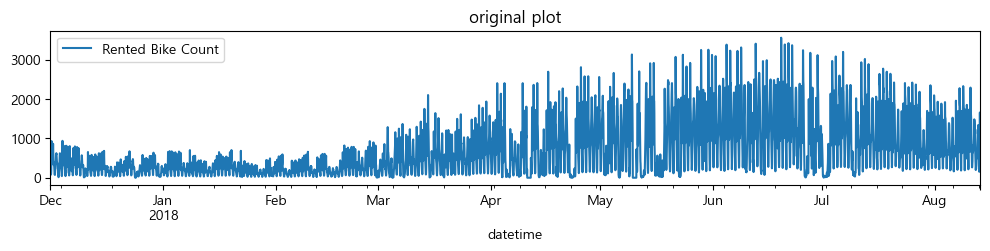

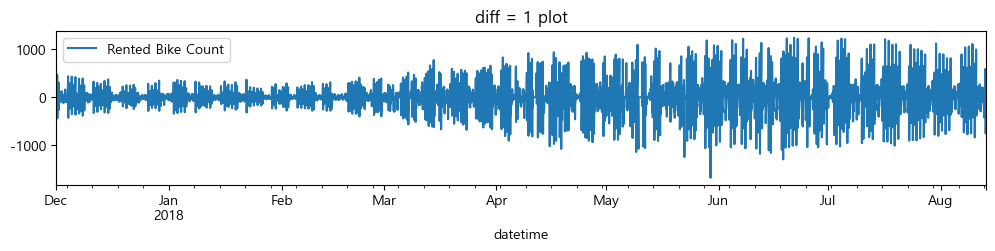

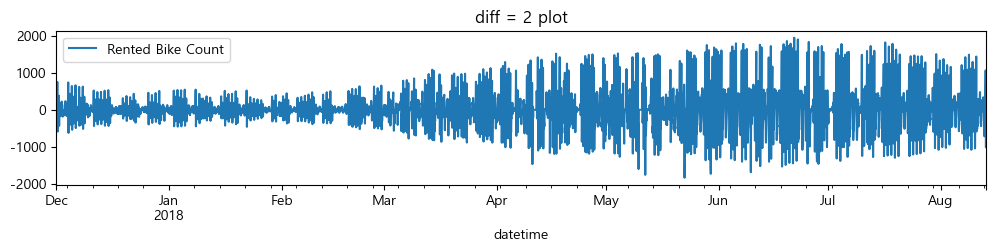

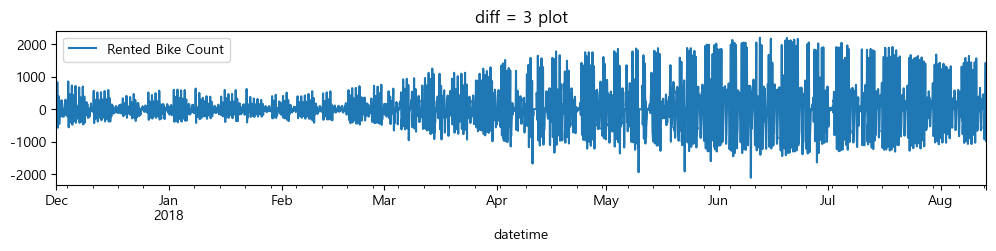

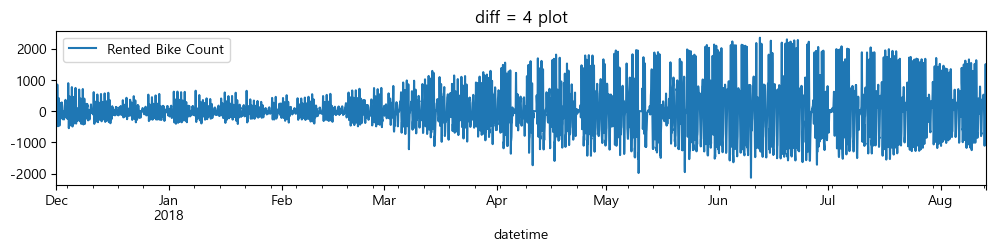

In [14]:
# 원본 그래프
training.plot(figsize=(12,2))
plt.title('original plot')

# 차분을 적용한 그래프
for diff in range(1, 5):
    training.diff(diff).plot(figsize=(12,2))
    plt.title(f'diff = {diff} plot')

In [15]:
diff_data = training.diff(1)
diff_data = diff_data.dropna()
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1])) # 정상성 만족

ADF Statistic: -16.99949159543196
p-value: 8.749915808771183e-30


- training 데이터가 이미 정상성을 만족하지만 보다 정상성을 만족하기 위해서 1차 차분을 진행한다.
- 정상성 검정 결과, 원본 training 보다 p-value 값이 더 감소한 것을 알 수 있다.

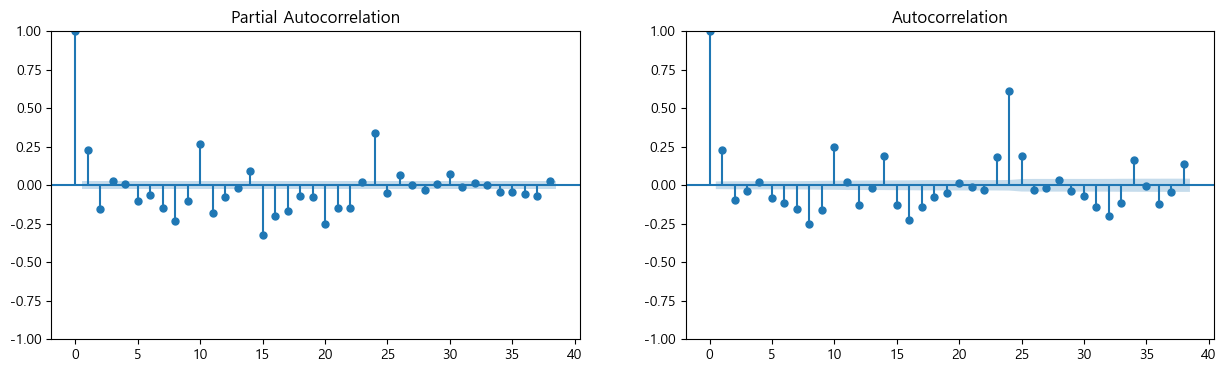

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, ax = plt.subplots(1,2,figsize=(15,4))
plot_pacf(diff_data, ax=ax[0]) # AR 모형
plot_acf(diff_data, ax=ax[1]) # MA 모형
plt.show()

In [20]:
# ARIMA 모형
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training, order=(2, 1, 2))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Rented Bike Count   No. Observations:                 6132
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -42619.026
Date:                Thu, 12 Oct 2023   AIC                          85248.052
Time:                        09:41:00   BIC                          85281.658
Sample:                    12-01-2017   HQIC                         85259.710
                         - 08-13-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5419      0.011    -48.960      0.000      -0.564      -0.520
ar.L2         -0.8805      0.008   -107.989      0.000      -0.896      -0.864
ma.L1          0.6920      0.010     71.652      0.000       0.673       0.711
ma.L2          0.8750      0.009     98.001      0.000       0.858       0.893
sigma2      6.547e+04    749.118     87.395      0.000     6.4e+04    6.69e+04
===================================================================================
Ljung-Box (L1) (Q):                 114.83   Jarque-Bera (JB):              4688.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.35   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

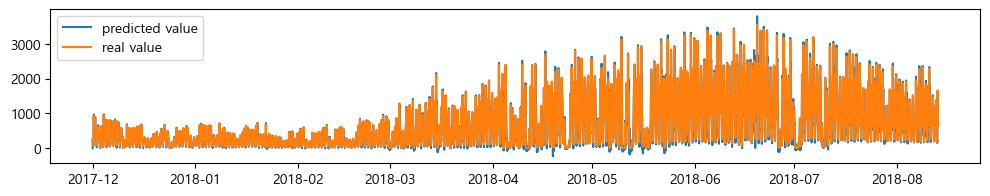

In [21]:
plt.figure(figsize=(12,2))
plt.plot(res.predict(), label='predicted value')
plt.plot(training, label='real value')
plt.legend();

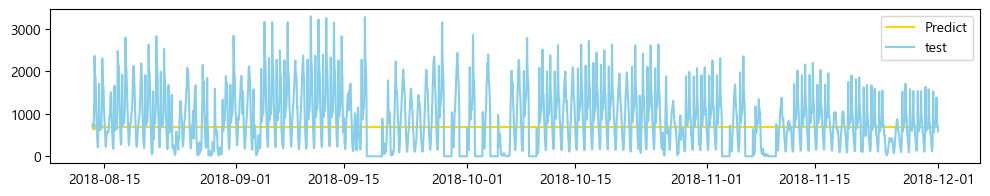

In [29]:
# 학습데이터로부터 test 데이터 길이만큼 예측
forecast_data = res.forecast(steps=len(test), alpha=.5)
pred_y = forecast_data

# 실제 데이터 정의
test_y = test

plt.figure(figsize=(12,2))
plt.plot(pred_y, color='gold', label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color='skyblue', label='test') # 실제 가격 그래프
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print('r2_score: ', r2_score(test_y, pred_y))
print('rmse: ', np.sqrt(mean_squared_error(test_y, pred_y)))

r2_score:  -0.04831016791223175
rmse:  663.4410232839091


R2 Score 값이 음수이므로 해당 모델의 정확도가 매우 낮다고 할 수 있다.

In [32]:
# SARIMA
from pmdarima import auto_arima
auto_model = auto_arima(training, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=85248.178, Time=13.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=85888.732, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=85563.746, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=85462.360, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=85886.732, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=85414.320, Time=1.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=85446.691, Time=1.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=85415.307, Time=9.69 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.75 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=85248.052, Time=3.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=in

In [33]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6132
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -42619.026
Date:                Thu, 12 Oct 2023   AIC                          85248.052
Time:                        09:51:58   BIC                          85281.658
Sample:                    12-01-2017   HQIC                         85259.710
                         - 08-13-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5419      0.011    -48.960      0.000      -0.564      -0.520
ar.L2         -0.8805      0.008   -107.989      0.000      -0.896      -0.864
ma.L1          0.6920      0.010     71.652      0.000       0.673       0.711
ma.L2          0.8750      0.009     98.001      0.000       0.858       0.893
sigma2      6.547e+04    749.118     87.395      0.000     6.4e+04    6.69e+04
===================================================================================
Ljung-Box (L1) (Q):                 114.83   Jarque-Bera (JB):              4688.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.35   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

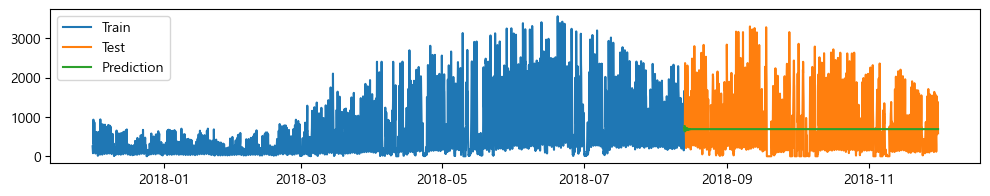

In [42]:
# 학습데이터로부터 test 데이터 길이만큼 예측
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)), index=test.index)
auto_pred_y.columns=['predicted_value']

plt.figure(figsize=(12,2))
plt.plot(training, label='Train') # Train 데이터
plt.plot(test, label='Test') # 실제 가격 그래프
plt.plot(auto_pred_y, label='Prediction') # 모델이 예상한 가격 그래프
plt.legend()
plt.show()

In [40]:
auto_pred_y

,predicted_value
datetime,
2018-08-13 12:00:00,766.748441
2018-08-13 13:00:00,659.196675
2018-08-13 14:00:00,638.462258
2018-08-13 15:00:00,744.394244
2018-08-13 16:00:00,705.242184
...,...
2018-11-30 19:00:00,689.728823
2018-11-30 20:00:00,689.728823
2018-11-30 21:00:00,689.728823


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print('r2_score: ', r2_score(test_y, auto_pred_y))
print('rmse: ', np.sqrt(mean_squared_error(test_y, auto_pred_y)))

r2_score:  -0.04831016791223175
rmse:  663.4410232839091


### 3. 머신러닝

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
import time

# 불필요한 변수 제거
df_drop = df.drop(['Hour', 'Date', 'datetime'], axis=1)

# X, y 분할
X = df_drop.drop('Rented Bike Count', axis=1)
y = df_drop['Rented Bike Count']

# 원-핫 인코딩 및 스케일링
X_dum = pd.get_dummies(data=X, columns=['Seasons', 'Holiday', 'Functioning Day', 'time_split'], drop_first=True)
X_scaled = X_dum.copy()
scaler = StandardScaler()
X_scaled.iloc[:, :8] = scaler.fit_transform(X_scaled.iloc[:, :8])

# 모델 객체 생성
lr_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knn_reg = KNeighborsRegressor()
vot_reg = VotingRegressor(estimators = [('LR', lr_reg), ('KNN', knn_reg), ('Lasso', lasso), ('Ridge', ridge)])
bag_reg = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=5), oob_score=True)
rfr_reg = RandomForestRegressor(random_state=321)
xgb_reg = XGBRegressor(random_state=321)
lgbm_reg = LGBMRegressor(random_state=321)

# 교차검증
for model in [lr_reg, lasso, ridge, svr, knn_reg, vot_reg, bag_reg, rfr_reg, xgb_reg, lgbm_reg]:
    if model in [lr_reg, lasso, ridge, svr, knn_reg]: 
        start = time.time()
        scores = cross_val_score(estimator=model, X=X_scaled, y=y, cv=5, 
                                 scoring='neg_mean_squared_error', n_jobs=-1)
        end = time.time()
    else:
        start = time.time()
        scores = cross_val_score(estimator=model, X=X_dum, y=y, cv=5, 
                                 scoring='neg_mean_squared_error', n_jobs=-1)
        end = time.time()
    
    print(f'### {model.__class__.__name__} ###')
    print(f'time: {round(end-start, 4)} sec')
    print(f'교차 검증 RMSE: {np.round(np.sqrt(np.abs(scores)), 4)}')
    print(f'교차 검증 평균 RMSE: {np.round(np.mean(np.sqrt(np.abs(scores))),4)}\n')

### LinearRegression ###
time: 0.1426 sec
교차 검증 RMSE: [320.6068 416.0457 649.7071 639.5617 389.1577]
교차 검증 평균 RMSE: 483.0158

### Lasso ###
time: 0.3851 sec
교차 검증 RMSE: [314.1476 412.126  648.4049 636.7011 391.9515]
교차 검증 평균 RMSE: 480.6662

### Ridge ###
time: 0.0804 sec
교차 검증 RMSE: [320.2057 415.7776 649.6436 639.5215 389.1806]
교차 검증 평균 RMSE: 482.8658

### SVR ###
time: 11.5529 sec
교차 검증 RMSE: [305.3268 352.6848 823.0565 631.2474 600.127 ]
교차 검증 평균 RMSE: 542.4885

### KNeighborsRegressor ###
time: 1.0885 sec
교차 검증 RMSE: [196.7998 468.1877 508.5053 559.4399 504.1985]
교차 검증 평균 RMSE: 447.4263

### VotingRegressor ###
time: 0.9143 sec
교차 검증 RMSE: [236.3098 372.2612 647.3465 640.4442 399.4008]
교차 검증 평균 RMSE: 459.1525

### BaggingRegressor ###
time: 0.5877 sec
교차 검증 RMSE: [281.3465 357.1181 524.9425 472.1296 519.777 ]
교차 검증 평균 RMSE: 431.0628

### RandomForestRegressor ###
time: 12.1949 sec
교차 검증 RMSE: [137.6763 381.0791 435.871  475.4337 409.6589]
교차 검증 평균 RMSE: 367.9438

### XGBRegressor #

- 속도 측면에서는 Ridge 모델이 가장 우수하지만, 성능(RMSE) 측면에서는 LGBMRegressor이 가장 우수하다.
- LGBMRegressor은 속도 측면에서도 우수하므로 LGBMRegressor을 최종 예측 모델로 선정한다.

In [82]:
# 데이터 분할
X_train, X_test, y_train, y_test =  train_test_split(X_dum, y, test_size=.3, random_state=321)

# 그리드서치
param_gird = {'max_depth ': [3, 5, 7],
         'min_child_weight': [1, 3],
         'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(estimator=lgbm_reg, cv=5, param_grid=param_gird, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
scores_df = pd.DataFrame(grid.cv_results_)
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ', grid.best_params_)

lgbm_estimator = grid.best_estimator_
pred = lgbm_estimator.predict(X_test)
print('테스트 데이터의 RMSE: ', round(np.sqrt(mean_squared_error(y_test, pred)), 4))

최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'learning_rate': 0.05, 'max_depth ': 3, 'min_child_weight': 1}
테스트 데이터의 RMSE:  262.5173


In [86]:
scores_df.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.346672,0.016624,0.011570,0.000489,0.05,5,1,"{'learning_rate': 0.05, 'max_depth ': 5, 'min_...",-81456.756715,-91152.683424,-82612.048879,-76955.875105,-79464.042547,-82328.281334,4812.000913,1
9,0.336299,0.017990,0.012766,0.002129,0.05,5,3,"{'learning_rate': 0.05, 'max_depth ': 5, 'min_...",-81456.756715,-91152.683424,-82612.048879,-76955.875105,-79464.042547,-82328.281334,4812.000913,1
11,0.353654,0.026548,0.013765,0.002220,0.05,7,3,"{'learning_rate': 0.05, 'max_depth ': 7, 'min_...",-81456.756715,-91152.683424,-82612.048879,-76955.875105,-79464.042547,-82328.281334,4812.000913,1
6,0.343680,0.013013,0.013964,0.002890,0.05,3,1,"{'learning_rate': 0.05, 'max_depth ': 3, 'min_...",-81456.756715,-91152.683424,-82612.048879,-76955.875105,-79464.042547,-82328.281334,4812.000913,1
7,0.336300,0.006475,0.011770,0.000398,0.05,3,3,"{'learning_rate': 0.05, 'max_depth ': 3, 'min_...",-81456.756715,-91152.683424,-82612.048879,-76955.875105,-79464.042547,-82328.281334,4812.000913,1
